In [1]:
%run -i ch03.py

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

X, y = shuffled
X.shape, y.shape

((60000, 784), (60000,))

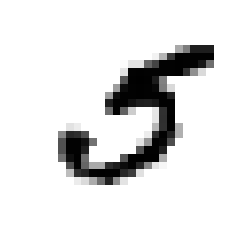

In [3]:
visualize_mnist(train, 36000)

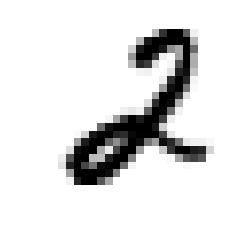

In [4]:
visualize_mnist(shuffled, 36000)

In [5]:
y[36000], y_[36000]

(2, 2)

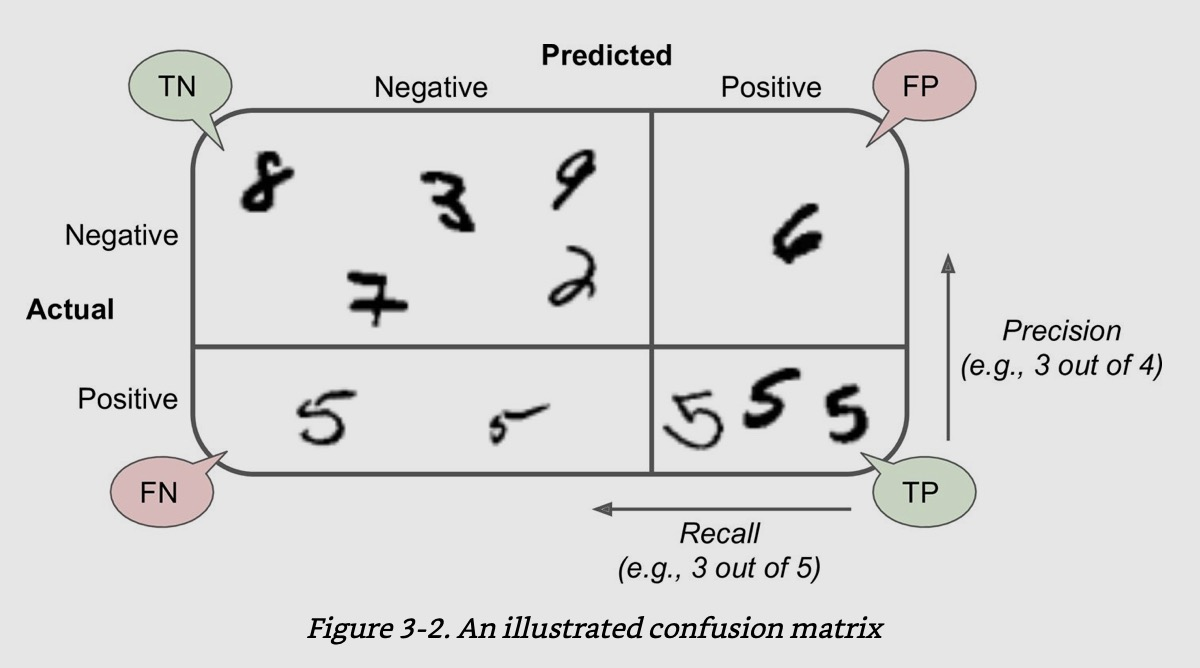

In [6]:
from IPython.display import Image
from const import PATH_SCREENSHOTS
Image(f'{PATH_SCREENSHOTS}/ch03/confusion.jpg', width=500)

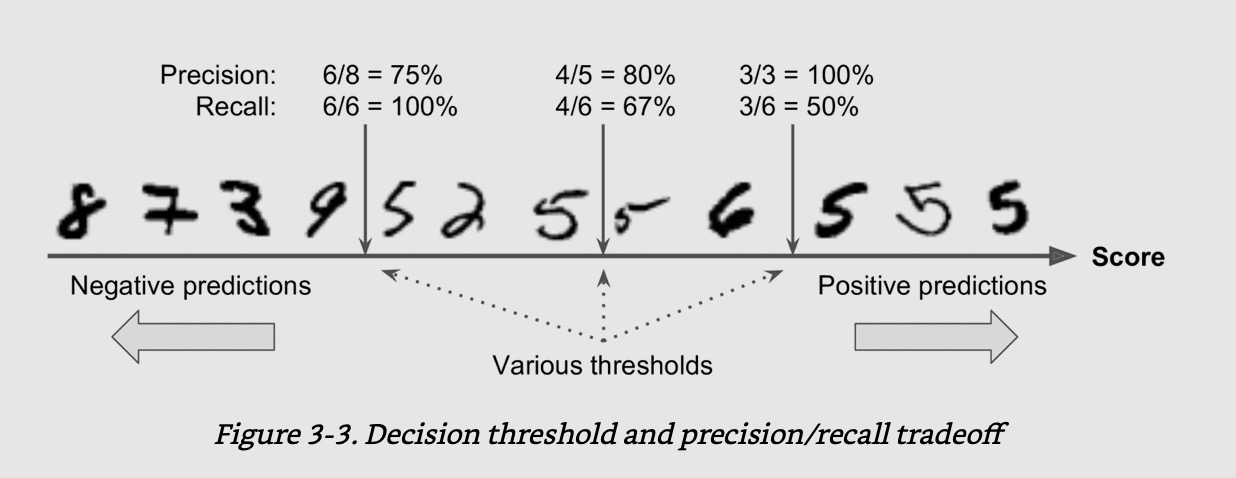

In [7]:
Image(f'{PATH_SCREENSHOTS}/ch03/thresholds.jpg', width=500)

In [20]:
features = X
labels = (y_ == 5)

from sklearn.linear_model import SGDClassifier
from models import BinaryClassifierModel as BCM

sgd = BCM(SGDClassifier, max_iter=5, tol=-np.infty, random_state=42)
sgd.evaluate(features, labels, cv=3)
print(sgd)
print(repr(sgd))

Generic model with algorithm: SGDClassifier
<models.BinaryClassifierModel object at 0x11c9c72e8>: SGDClassifier,
size: 60000.00, auc: 0.88, sensitivity: 0.78, specificity: 0.97, precision: 0.75


In [9]:
def prc_graph(p, r, t):
    plt.figure(figsize=(8, 4))
    plt.plot(t, p[:-1], 'b--', label="Precision")
    plt.plot(t, r[:-1], 'g-', label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    plt.xlim([-700000, 700000])
    plt.show()
    
def pr_graph(p, r):
    plt.figure(figsize=(8, 4))
    plt.plot(r[:-1], p[:-1], 'b-', label="Precision")
    plt.xlabel("Recall")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.show()
    
def roc_graph(fpr, tpr, label=None):
    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate (1 - Specificity)")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.show()

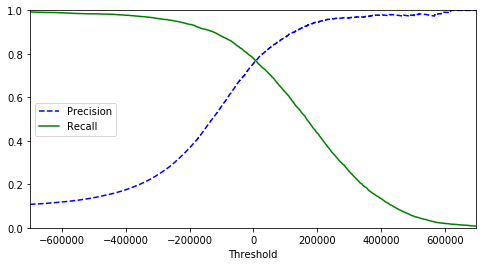

In [10]:
p, r, th, pr = sgd.pc_curve(cv=3, method='decision_function')

prc_graph(p, r, th)

In [13]:
from sklearn.metrics import precision_score, recall_score

ths = [100000 * (x - 7) for x in range(15)]

for th in ths:
    z = (pr > th)
    ps = precision_score(labels, z)
    rs = recall_score(labels, z)
    print(f'{th}, {z[z==True].shape}, {ps:.4f}, {rs:.4f}')

-700000, (49904,), 0.1078, 0.9924
-600000, (45105,), 0.1188, 0.9887
-500000, (38499,), 0.1385, 0.9840
-400000, (30315,), 0.1748, 0.9775
-300000, (21444,), 0.2433, 0.9626
-200000, (13812,), 0.3671, 0.9353
-100000, (8567,), 0.5575, 0.8810
0, (5597,), 0.7549, 0.7794
100000, (3866,), 0.8758, 0.6246
200000, (2504,), 0.9449, 0.4365
300000, (1463,), 0.9658, 0.2607
400000, (751,), 0.9774, 0.1354
500000, (305,), 0.9770, 0.0550
600000, (110,), 0.9909, 0.0201
700000, (42,), 1.0000, 0.0077


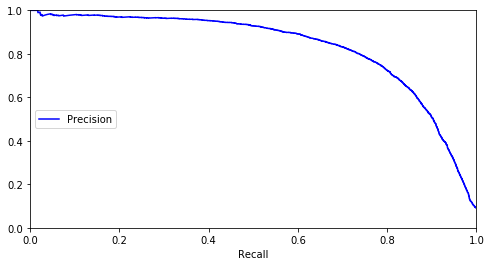

In [14]:
pr_graph(p, r)

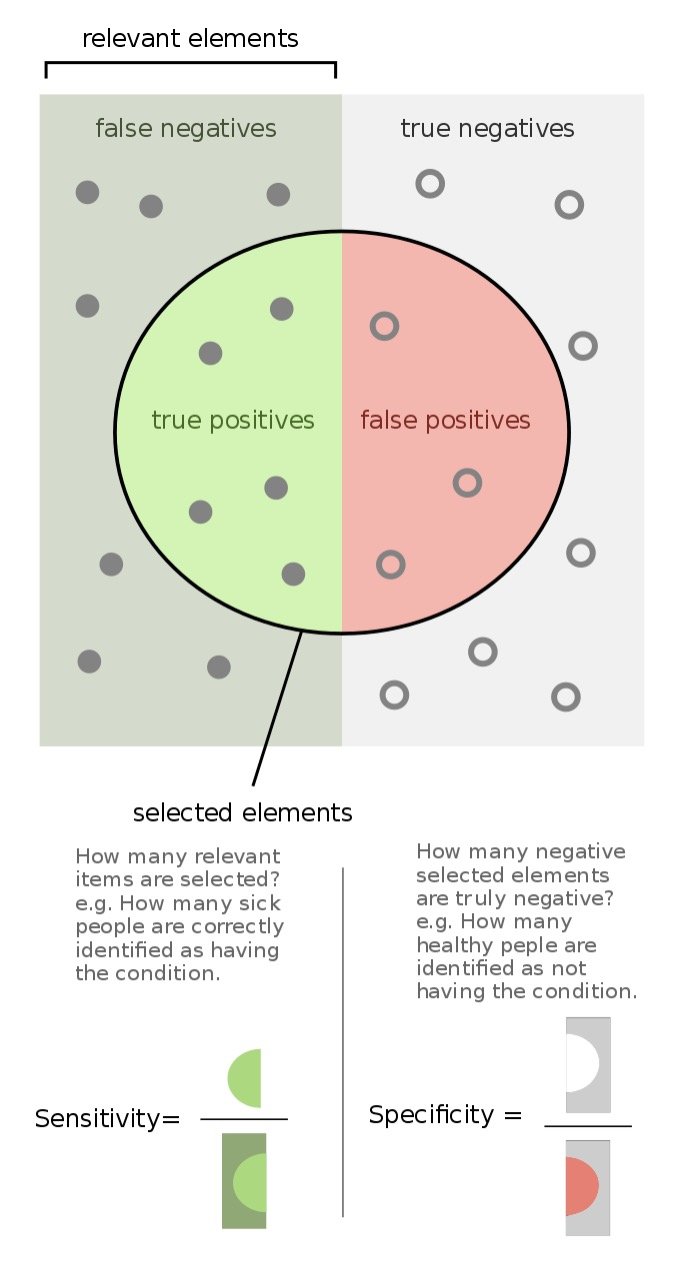

In [15]:
Image(f'{PATH_SCREENSHOTS}/ch03/specificity.jpg', width=300)

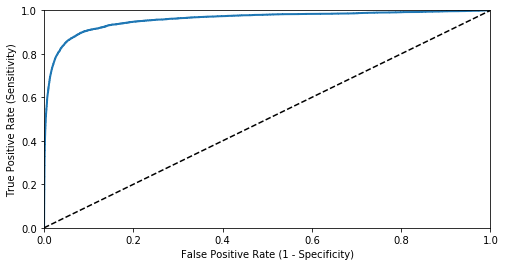

In [18]:
fpr, tpr, th, pr = sgd.roc_curve(cv=3, method='decision_function')
roc_graph(fpr, tpr)